# The Data Incubator Proposal
## Phillip Yen October 2017

### I plan to develop a career exploration tool that helps job seekers find job listings that are most appropriate to apply to based on the skills listed on their resume.

### In the following program, I have implemented a prototype tool that scrapes job listings from Indeed.com to show which skills are the most desired for particular jobs search terms. The three search terms I decided to test the program on were "bioininformatics", "data science", and "data mining".


In [2]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import itertools

matplotlib.rcParams['figure.figsize'] = 8,8

## Function to scrape job listings from Indeed.com:

In [3]:
def scrape_indeed(k):
    keyword = k.replace(" ", "+")
    base_url = "https://www.indeed.com/jobs?q=" + keyword + "&start="
    urls = []
    num = [x*10 for x in range(51)]
    for i in num:
        urls.append(base_url + str(i))

    temp_names = []
    temp_experiences = []
    
    for url in urls:
        uClient = uReq(url)
        page_html = uClient.read()
        uClient.close()
        page_soup = soup(page_html, "html.parser")
        containers = page_soup.findAll("div", {"class":"row"})
        for container in containers:
            experiences = container.findAll("span",{"class":"experienceList"})
            job_title = container.a["title"].strip()
            if len(experiences) > 0:
                temp_names.append(job_title)
                temp_experiences.append(experiences[0].text)
            else:
                temp_names.append(job_title)
                temp_experiences.append("none_listed")

    df = pd.DataFrame({'title': temp_names, 'experiences': temp_experiences})
    cols = df.columns.tolist()
    cols = ['title','experiences']
    df = df[cols]
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)

    experiences_dump = []
    for i in df["experiences"]:
        temp = i.split(",")
        for j in temp:
            experiences_dump.append(j.strip())

    s = pd.Series(experiences_dump)
    
    return df, s

In [4]:
def plot_skills(name,s):
    s_trunc = s.value_counts()
    s_trunc = s_trunc.iloc[0:50]
    plt.figure(figsize =(10,10))
    s_trunc.plot(kind="barh")
    plt.gca().invert_yaxis()
    plt.ylabel('skill')
    plt.xlabel('count')
    plt.title("Skills needed for %s jobs" % name)
    plt.show()

## The following histograms show which skills are the most frequently desired for jobs that match the three search terms. 

## Approximately 500 jobs were scraped for each of the three search terms.

In [5]:
df_bioinf, s_bioinf = scrape_indeed('bioinformatics')
df_datsci, s_datsci = scrape_indeed('data science')
df_datmin, s_datmin = scrape_indeed('data mining')

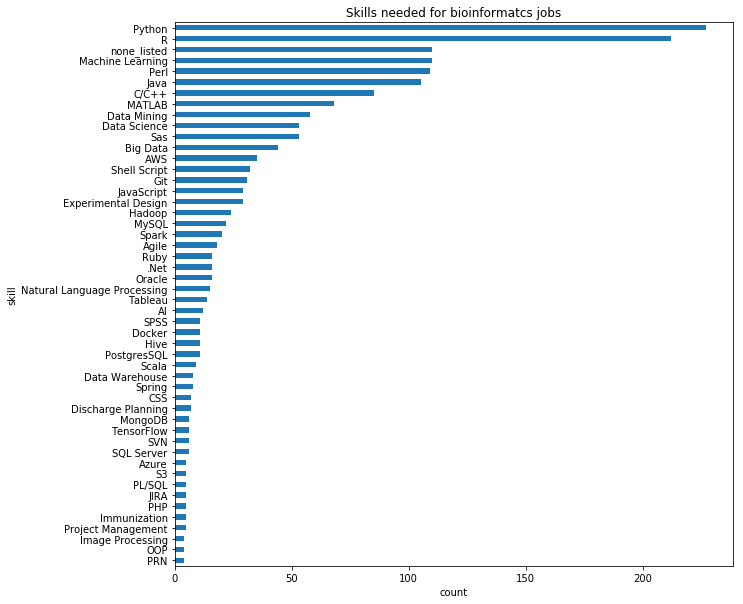

In [6]:
plot_skills('bioinformatcs',s_bioinf)

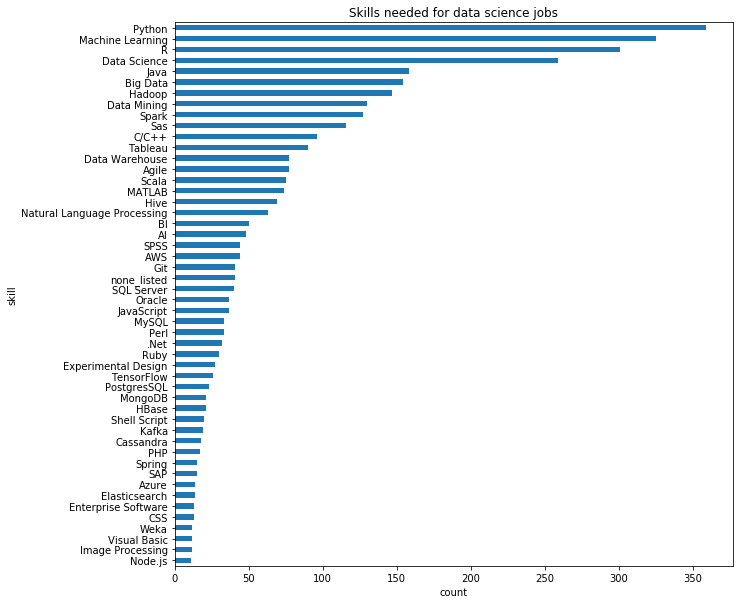

In [7]:
plot_skills('data science',s_datsci)

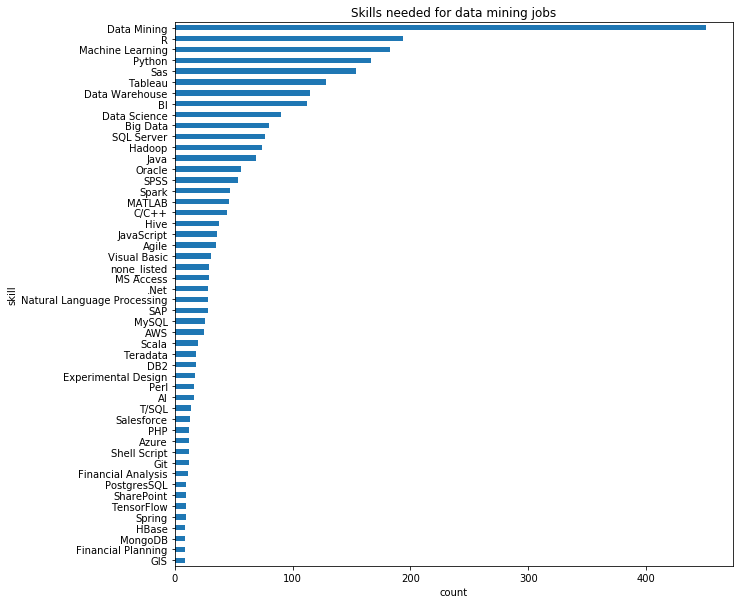

In [8]:
plot_skills('data mining',s_datmin)

## Top five skills in order of importance for different job keywords:

### Bioinformatics
1. Python
2. R
3. Machine learning
4. Perl
5. Java

### Data Science
1. Python
2. Machine learning
3. R
4. Data science
5. Big data

### Data Mining
1. Data mining
2. Machine laerning
3. R
4. Python
5. SAS

In [9]:
df_bioinf

,title,experiences
0,Bioinformatics Analyst,none_listed
1,Genomics Specialist- Biostatician,"R, MATLAB, SPSS, Sas"
2,"Research Assoc/ Sr. Research Associate, Applic...",none_listed
3,Data Scientist - Computational Biology and Inf...,"R, MySQL, Git, Data Science"
4,Bioinformatics Analyst (NCI),"Perl, R, Java, Data Science, Python"
5,Bioinformatics Scientist,none_listed
6,Programmer / Analyst II,"Big Data, Data Warehouse"
7,Bioinformatics Data Analyst I,"C/C++, Java, OOP, Python"
8,Scientist III-Genomics/Bioinformatics,none_listed
9,Bioinformatic Data Scientist,"Agile, Perl, R, PL/SQL, Oracle, Java, Data War..."
